In [2]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")
df = pd.read_csv("homeprices1.csv")

In [3]:
df.shape

(13, 3)

In [4]:
df.columns.tolist()

['town', 'area', 'price']

In [5]:
df.isnull().any(axis=0)

town     False
area     False
price    False
dtype: bool

In [6]:
feature = df['area'].values

In [7]:
label = df['price'].values

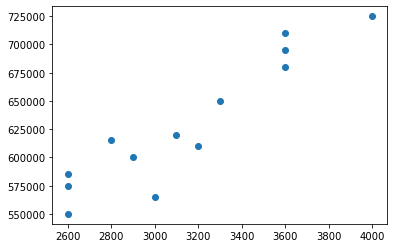

In [8]:
import matplotlib.pyplot as plt
plt.scatter(feature, label)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regressor = LinearRegression()

In [11]:
feature = feature.reshape(13,1)

In [12]:
regressor.fit(feature, label)

LinearRegression()

In [13]:
m = regressor.coef_

In [14]:
c = regressor.intercept_

In [15]:
x = 3600

In [16]:
(m*x)+c

array([682918.48164281])

In [17]:
regressor.predict([[3600]])

array([682918.48164281])

In [18]:
regressor.predict(feature)

array([564623.52209085, 611941.50591164, 635600.49782203, 682918.48164281,
       730236.4654636 , 564623.52209085, 588282.51400124, 647429.99377722,
       682918.48164281, 564623.52209085, 600112.00995644, 623771.00186683,
       682918.48164281])

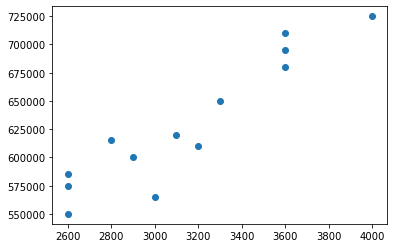

In [19]:
plt.scatter(feature,label)

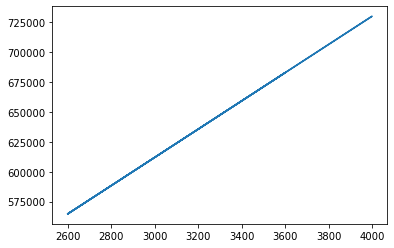

In [20]:
plt.plot(feature,regressor.predict(feature))

In [21]:
i = input("Enter the area: ")
ans = regressor.predict([[i]])
print("Price will be:",int(ans[0]))

Enter the area: 5555
Price will be: 914185


# Multiple value

In [22]:
df = pd.read_csv("Housing.csv")

In [23]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [24]:
df.shape

(545, 13)

In [25]:
df.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1,inplace=True)

In [26]:
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [27]:
df.columns.tolist()

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [28]:
df.isnull().any(axis=0)

price        False
area         False
bedrooms     False
bathrooms    False
stories      False
parking      False
dtype: bool

In [29]:
feature = df[['area','bedrooms','bathrooms','stories','parking']].values

In [30]:
label = df['price'].values

In [31]:
reg = LinearRegression()

In [32]:
df.shape

(545, 6)

In [33]:
feature = feature.reshape(545,5)

In [34]:
reg.fit(feature, label)

LinearRegression()

In [35]:
reg.predict([[7420,4,2,3,2]])

array([7648873.96926545])

# Class

In [66]:
def variance(values, mean):
    return sum([(val-mean)**2 for val in values])

def covariance(x, mean_x, y , mean_y):
    covariance = 0.0
    for r in range(len(x)):
        covariance = covariance + (x[r] - mean_x) * (y[r] - mean_y)
    return covariance

def train(df,x,y):
    mean_x = sum(df[x]) / float(len(df[x]))
    mean_y = sum(df[y]) / float(len(df[y]))
    variance_x, variance_y = variance(df[x], mean_x), variance(df[y], mean_y)
    covariance_x_y = covariance(df[x],mean_x,df[y],mean_y)
    m = covariance_x_y / variance_x
    c = mean_y - m * mean_x
    lst = [m,c]
    return lst
    
def predict(lst,x):
    m = lst[0]
    c = lst[1]
    return m*x+c

In [67]:
df = pd.read_csv("Salary_Data.csv")
lst = train(df,"YearsExperience","Salary")
print(predict(lst,4))

63592.049484489
